# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# データの読み込み

In [2]:
pd.set_option('display.max_rows', 85)
df_train = pd.read_csv("data/input/train.csv")
df_test = pd.read_csv("data/input/test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# データの前処理

In [5]:
# データの結合
connection_df = pd.concat((df_train, df_test))
connection_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
connection_df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [7]:
# ["SalePrice"]の確認：describe
connection_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
connection_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [10]:
connection_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# 欠損値の処理

In [11]:
# 欠損値の確認
connection_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
# 文字型の処理(欠損値が多いもの)
for col in ("Alley","MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure",
            "BsmtFinType1", "BsmtFinType2","FireplaceQu","GarageType",
            "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"):
    connection_df[col] = connection_df[col].fillna("None")

In [14]:
# 文字型の処理(欠損値が少ないもの)
connection_df["MSZoning"] = connection_df["MSZoning"].fillna(connection_df["MSZoning"].mode()[0])
connection_df["Utilities"] = connection_df["Utilities"].fillna(connection_df["Utilities"].mode()[0])
connection_df["Exterior1st"] = connection_df["Exterior1st"].fillna(connection_df["Exterior1st"].mode()[0])
connection_df["Exterior2nd"] = connection_df["Exterior2nd"].fillna(connection_df["Exterior2nd"].mode()[0])
connection_df["Electrical"] = connection_df["Electrical"].fillna(connection_df["Electrical"].mode()[0])
connection_df["KitchenQual"] = connection_df["KitchenQual"].fillna(connection_df["KitchenQual"].mode()[0])
connection_df["Functional"] = connection_df["Functional"].fillna(connection_df["Functional"].mode()[0])
connection_df["SaleType"] = connection_df["SaleType"].fillna(connection_df["SaleType"].mode()[0])

In [15]:
# 数値型の処理
for col in ("LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
            "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt","GarageCars",
            "GarageArea", "SalePrice"):
    connection_df[col] = connection_df[col].fillna("None")

In [16]:
connection_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [24]:
for col in ("LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
            "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt","GarageCars",
            "GarageArea", "SalePrice"):
    connection_df[col] = connection_df[col].replace("None", np.nan)

C:\Users\ut122\AppData\Local\Temp\ipykernel_11120\4218603171.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  connection_df[col] = connection_df[col].replace("None", np.nan)


# 数値型と小数点型のみのデータでヒートマップを作成

In [25]:
connection_df = connection_df.astype({"LotFrontage": "float64", "MasVnrArea": "float64", 
                                      "BsmtFinSF1": "float64" , "BsmtFinSF2": "float64", 
                                      "BsmtUnfSF": "float64", "TotalBsmtSF": "float64",
                                      "BsmtFullBath": "float64", "BsmtHalfBath": "float64",
                                      "GarageYrBlt": "float64","GarageCars": "float64",
                                      "GarageArea": "float64", "SalePrice": "float64"})

In [28]:
connection_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


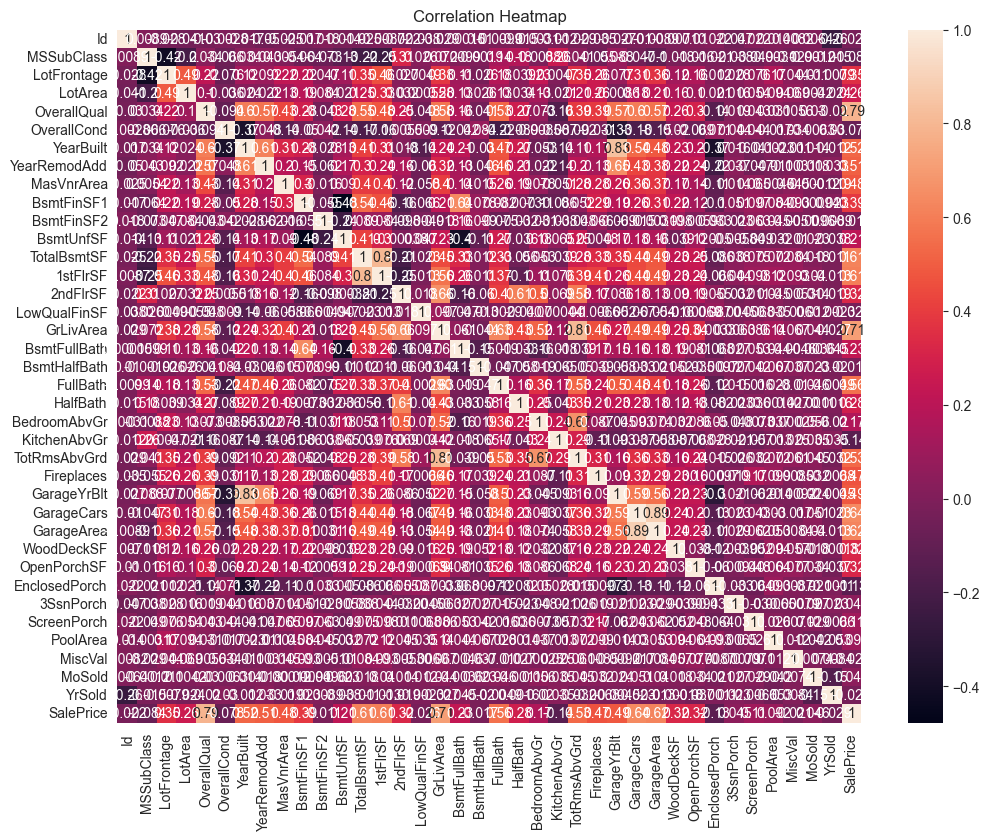

In [26]:
# ヒートマップ
plt.figure(figsize=(12,9))
sns.heatmap(connection_df.select_dtypes(include=[np.number, bool]).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [27]:
connection_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [22]:
connection_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [29]:
# SalesPriceとの相関の強さ（相関係数）を降順にソート
corr = connection_df.select_dtypes(include=[np.number, bool]).corr()
corr.sort_values("SalePrice", ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
GrLivArea,-0.029046,0.071677,0.382462,0.284519,0.575126,-0.116569,0.242666,0.316972,0.402994,0.211669,...,0.251017,0.341907,0.003274,0.006268,0.086284,0.135441,0.067118,0.044198,-0.026919,0.708624
GarageCars,-0.010208,-0.046597,0.310587,0.180434,0.600744,-0.181787,0.538074,0.426022,0.361190,0.255482,...,0.240715,0.203544,-0.132846,0.023383,0.043112,0.030424,-0.016934,0.050882,-0.022918,0.640409
GarageArea,-0.008865,-0.103394,0.359786,0.213251,0.565122,-0.154149,0.480735,0.376765,0.374061,0.310449,...,0.238075,0.232559,-0.106417,0.029440,0.062389,0.053049,0.008446,0.040335,-0.013451,0.623431
TotalBsmtSF,-0.024924,-0.219965,0.354822,0.254138,0.549294,-0.174002,0.408515,0.298107,0.397240,0.536467,...,0.229600,0.245521,-0.085510,0.037892,0.075363,0.072216,0.084002,0.017888,-0.011184,0.613581
1stFlrSF,-0.008678,-0.248641,0.458247,0.332460,0.479152,-0.157418,0.310814,0.242245,0.395834,0.458092,...,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143,-0.013442,0.605852
FullBath,-0.009946,0.139140,0.181668,0.125826,0.528483,-0.215504,0.471169,0.457980,0.259777,0.081525,...,0.181266,0.260423,-0.118983,0.015192,-0.015910,0.028091,-0.010024,0.046274,-0.004882,0.560664
TotRmsAbvGrd,-0.029368,0.040509,0.349513,0.213802,0.389761,-0.092027,0.114280,0.198250,0.278228,0.052141,...,0.156543,0.238156,0.015345,-0.025764,0.032324,0.072061,0.060903,0.045137,-0.032354,0.533723
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897


array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='SalePrice', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='YearBuilt'>,
        <Axes: xlabel='YearBuilt', ylabel='YearBuilt'>,
        <Axes: xlabel='YearRemodAdd', ylabel='YearBuilt'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='YearBuilt'>,
        <Axes: xlabel='1stFlrSF', ylabel='YearBuilt'>,
        <Axes: xlabel='GrLivArea', ylabel='YearBuilt'>,
        <

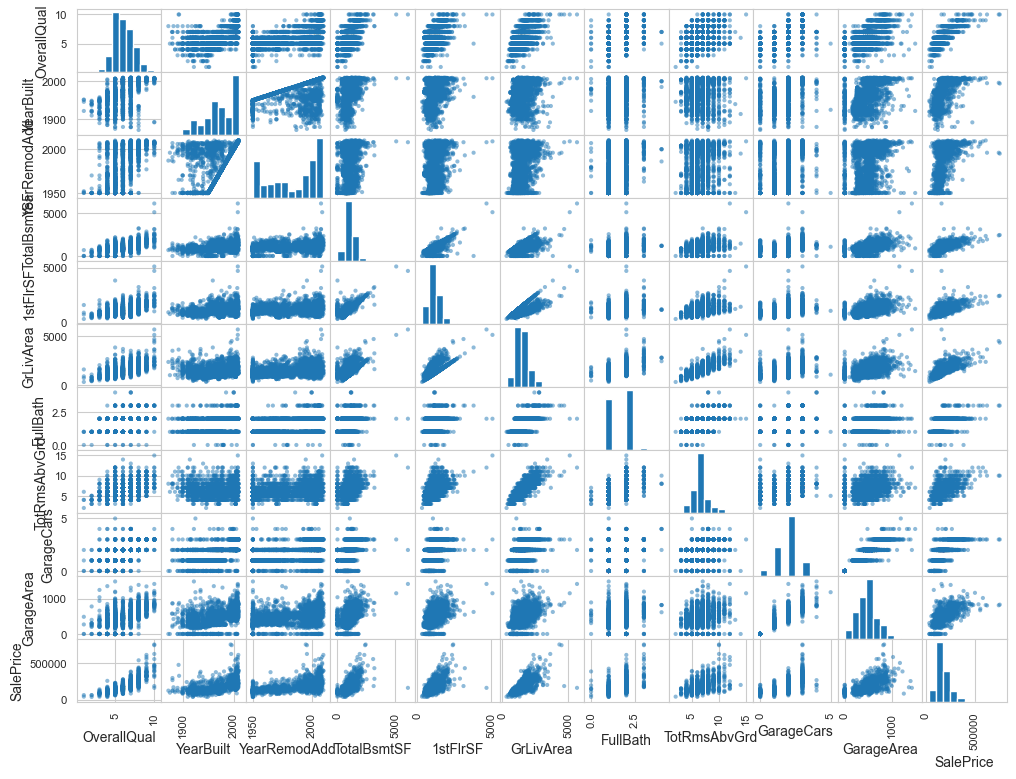

In [30]:
# 散布図行列の表示
pd.plotting.scatter_matrix(connection_df[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF","GrLivArea",
                                          "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]], figsize=(12,9), range_padding=0.2)

# エンコーディング

In [31]:
# 不要行の削除
connection_df = connection_df.drop(["Utilities", "OverallQual", "FullBath", "TotRmsAbvGrd", "GarageArea"], axis=1)

In [32]:
# ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(connection_df[col].values))
    connection_df[col] = lbl.transform(list(connection_df[col].values))

In [33]:
connection_df[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']].head(10)

,FireplaceQu,BsmtQual,BsmtCond,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,BsmtFinType1,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,2,4,0,3,2,2,...,0,3,2,1,1,1,5,4,2,1
1,5,2,4,5,3,4,0,3,3,0,...,0,3,2,1,1,1,0,7,1,4
2,5,2,4,5,2,4,0,3,2,2,...,0,0,2,1,1,1,5,4,2,8
3,2,4,1,5,3,4,2,3,2,0,...,0,0,2,1,1,1,6,4,0,1
4,5,2,4,5,2,4,0,3,2,2,...,0,0,2,1,1,1,5,4,2,11
5,3,2,4,5,3,4,0,3,3,2,...,0,0,2,1,1,1,4,4,3,9
6,2,0,4,5,2,4,0,3,2,2,...,0,3,2,1,1,1,0,4,1,7
7,5,2,4,5,3,4,0,3,3,0,...,0,0,2,1,1,1,5,5,3,10
8,5,4,4,5,3,4,2,3,3,6,...,0,3,2,1,1,1,4,4,2,3
9,5,4,4,5,3,4,0,3,3,2,...,0,3,2,1,1,1,15,5,2,0


In [34]:
# ワンホットエンコーディング（ラベルエンコーディング済みのものは対象外になる）
connection_df = pd.get_dummies(connection_df, drop_first=True)

In [38]:
corr.sort_values("SalePrice", ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
GrLivArea,-0.029046,0.071677,0.382462,0.284519,0.575126,-0.116569,0.242666,0.316972,0.402994,0.211669,...,0.251017,0.341907,0.003274,0.006268,0.086284,0.135441,0.067118,0.044198,-0.026919,0.708624
GarageCars,-0.010208,-0.046597,0.310587,0.180434,0.600744,-0.181787,0.538074,0.426022,0.361190,0.255482,...,0.240715,0.203544,-0.132846,0.023383,0.043112,0.030424,-0.016934,0.050882,-0.022918,0.640409
GarageArea,-0.008865,-0.103394,0.359786,0.213251,0.565122,-0.154149,0.480735,0.376765,0.374061,0.310449,...,0.238075,0.232559,-0.106417,0.029440,0.062389,0.053049,0.008446,0.040335,-0.013451,0.623431
TotalBsmtSF,-0.024924,-0.219965,0.354822,0.254138,0.549294,-0.174002,0.408515,0.298107,0.397240,0.536467,...,0.229600,0.245521,-0.085510,0.037892,0.075363,0.072216,0.084002,0.017888,-0.011184,0.613581
1stFlrSF,-0.008678,-0.248641,0.458247,0.332460,0.479152,-0.157418,0.310814,0.242245,0.395834,0.458092,...,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143,-0.013442,0.605852
FullBath,-0.009946,0.139140,0.181668,0.125826,0.528483,-0.215504,0.471169,0.457980,0.259777,0.081525,...,0.181266,0.260423,-0.118983,0.015192,-0.015910,0.028091,-0.010024,0.046274,-0.004882,0.560664
TotRmsAbvGrd,-0.029368,0.040509,0.349513,0.213802,0.389761,-0.092027,0.114280,0.198250,0.278228,0.052141,...,0.156543,0.238156,0.015345,-0.025764,0.032324,0.072061,0.060903,0.045137,-0.032354,0.533723
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897


In [40]:
corr = connection_df.select_dtypes(include=[np.number, bool]).corr()

array([[<Axes: xlabel='YearBuilt', ylabel='YearBuilt'>,
        <Axes: xlabel='YearRemodAdd', ylabel='YearBuilt'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='YearBuilt'>,
        <Axes: xlabel='1stFlrSF', ylabel='YearBuilt'>,
        <Axes: xlabel='GrLivArea', ylabel='YearBuilt'>,
        <Axes: xlabel='GarageCars', ylabel='YearBuilt'>,
        <Axes: xlabel='SalePrice', ylabel='YearBuilt'>],
       [<Axes: xlabel='YearBuilt', ylabel='YearRemodAdd'>,
        <Axes: xlabel='YearRemodAdd', ylabel='YearRemodAdd'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='YearRemodAdd'>,
        <Axes: xlabel='1stFlrSF', ylabel='YearRemodAdd'>,
        <Axes: xlabel='GrLivArea', ylabel='YearRemodAdd'>,
        <Axes: xlabel='GarageCars', ylabel='YearRemodAdd'>,
        <Axes: xlabel='SalePrice', ylabel='YearRemodAdd'>],
       [<Axes: xlabel='YearBuilt', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='YearRemodAdd', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='TotalBsmtSF'>,
    

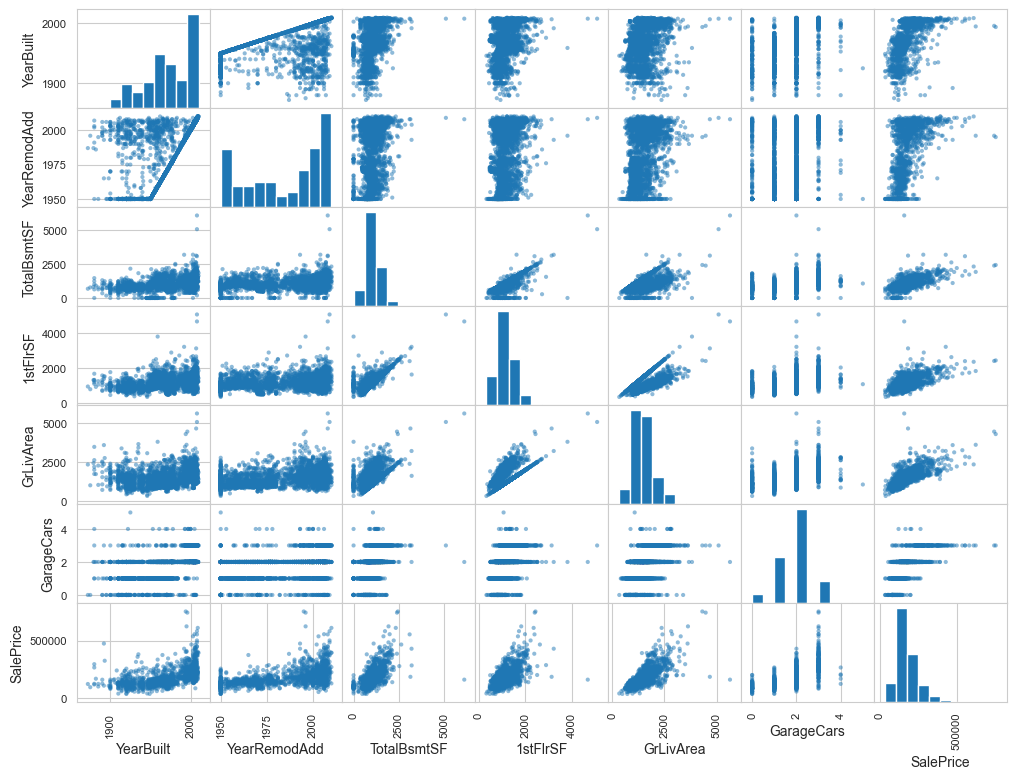

In [42]:
# 散布図行列の表示
pd.plotting.scatter_matrix(connection_df[["YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF",
                                          "GrLivArea", "GarageCars", "SalePrice"]], figsize=(12,9), range_padding=0.2)

In [43]:
connection_df.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              486
LotArea                    0
Street                     0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 202, dtype: int64

In [35]:
connection_df.to_csv("data/input/pretreatment_data01.csv", index=False)

# 学習データの分割

In [31]:
# データの分割
train_df = connection_df[:len(df_train)]
test_df = connection_df[len(df_train):].drop(columns=['SalePrice'])

# X_trainには、SalePriceを除いたtrain_dfを代入
X_train = train_df.drop("SalePrice", axis=1)

# y_trainには、SalePriceのみが入ったtrain_dfを代入
y_train = train_df["SalePrice"]

# X_testにはtrain_dfを代入
X_test = test_df

print(X_train.shape, y_train.shape, X_test.shape)

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def run_cv(model):
    """
    
    :param model: 
    :return: 
    """
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    rmse_results = []
    models = []
    
    for trn_index, val_index in cv.split(X_train):
        X_trn, X_val = X_train.loc[trn_index], X_train.loc[val_index]
        y_trn, y_val = y_train[trn_index], y_train[val_index]
        
        # モデルの学習
        model.fit(X_trn, y_trn)
        pred = model.predict(X_val)
        
        # モデル制度の算出
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        print("RMSE:", rmse)
        models.append(model)
    
    print(rmse_results)
    print("Average RMSE:", np.mean(rmse_results))
    return models

In [35]:
import lightgbm as lgb

lgb_params = {
    "objective":"regression",
    "metric": "rmse"
}

cv = KFold(n_splits=3, random_state=42, shuffle=True)
rmse_results = []
lgbm_models = []
# テストデータに対する予測結果を格納するための空の配列
test_preds = np.zeros(len(X_test))

for trn_index, val_index in cv.split(X_train, y_train):
    X_trn, X_val = X_train.loc[trn_index], X_train.loc[val_index]
    y_trn, y_val = y_train[trn_index], y_train[val_index]
    
    train_lgb = lgb.Dataset(X_trn, y_trn)
    validation_lgb = lgb.Dataset(X_val, y_val)
    model = lgb.train(
        lgb_params, train_lgb, 
        num_boost_round=1000, valid_sets=[train_lgb, validation_lgb], 

        )
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print("RMSE:", rmse)
    rmse_results.append(rmse)
    lgbm_models.append(model)

    test_preds += model.predict(X_test) / cv.n_splits

print(rmse_results)
print("Average:", np.mean(rmse_results))

# データの提出

In [36]:
submission = pd.read_csv("sample_submission.csv")
submission["SalePrice"] = test_preds

# 提出ファイルの出力
submission.to_csv("submission.csv", index=False)